# 07.02 - Regularisation (Ridge Regression)

## Overview of regularization

**Regularization in regression models aims to prevent overfitting by structurally imposing penalties on the model's coefficients.**

Overfitting is a common problem in machine learning where a model performs well on the training data but poorly on unseen data. This is usually due to the model learning the noise in the training data, making it too complex and less generalized for new data.

Regularization techniques, such as Ridge Regression, add an additional 'penalty' term to the loss function. The loss function is a measure of how well the model predicts the actual values. In simple terms, it measures the error between the predicted values and the actual values.

In Ridge Regression, this penalty term is added to the Residual Sum of Squares (RSS), which is the sum of the squares of the difference between the predicted and actual values. This additional term penalizes the model for having large coefficients, thus preventing overfitting.

The process of minimizing the loss function thus becomes a trade-off between two factors: reducing the error between the predicted and actual values, and keeping the coefficients as small as possible. This balance helps to create a model that generalizes well to unseen data.

## Review: Least Squares Loss Function

Ordinary least squares regression, a commonly used technique for estimating the unknown parameters in a linear regression model, operates by minimizing the residual sum of squares (RSS). RSS is a measure of the discrepancy between the data and an estimation model. In essence, it represents the differences between the actual output and the predicted output of the model.

The formula for RSS is as follows:

### $$ \text{minimize:}\; RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 $$


In this equation, $y_i$ represents the actual output, and $\hat{y}_i$ represents the predicted output. The goal is to minimize the sum of the squared residuals, hence the term 'least squares'. Each predicted output $\hat{y}_i$ is computed as the sum of the $\beta_0$ intercept and the products of $\beta_i$ with $x_i$.

The important points to remember here are:

- Machine learning often comes down to optimization, which is the process of finding the best solution from all feasible solutions.
- Training or fitting a model means minimizing a "loss function" (also known as a cost or objective function). For linear regression, this loss function is the RSS (or mean squared error, MSE), and the optimization is performed with respect to the $\beta$ coefficients.
- Minimizing the loss function results in the best set of $\beta$ values for your regression model.

Alternatively, we can express the RSS in matrix notation using the predictor matrix $X$, the residual errors $\epsilon$, and the vector of beta coefficients $\beta$ as follows:

### $$ \text{minimize:}\; RSS = \varepsilon^T \varepsilon = (X \beta - y)^T (X \beta - y) $$

This equation provides the same information as the RSS formula, but in a more compact form.

## Effect of Regularization

To understand the effect of regularization, let's consider a dataset on wine quality. A unique characteristic of this dataset that necessitates the use of regularization is the presence of **multicollinearity**, a term that refers to high correlations between predictor variables in your model.

Multicollinearity can lead to several problems:

1. The estimated effect of predictor variables by your regression will be contingent on what other variables are included in your model.
2. The effects of predictors can vary drastically depending on the observations in your sample, and small changes in samples can result in significantly different estimated effects.
3. In cases of severe multicollinearity, the inverse matrix computed by the computer may not be precise.
4. The interpretation of a coefficient on a variable as the effect on the target of a one-unit increase in that variable, keeping the other variables constant, is no longer valid. This is because when predictors are strongly correlated, there can't be a scenario where one variable changes without a corresponding change in another variable.

As an example, consider a scenario where you want to predict home prices using predictors like the number of bedrooms upstairs, the number of bedrooms downstairs, and the total number of bedrooms. This could lead to a high degree of multicollinearity, causing complications in your model.

Ridge Regression is particularly well-suited to handle multicollinearity. By adding a penalty term to the loss function, Ridge Regression discourages large coefficients, thereby reducing the risks associated with multicollinearity.

### Loading the Wine Dataset

In this section, we will be loading a comprehensive wine dataset that combines information about both red and white wines. The wines are distinguished by a binary indicator, where '1' represents red wine and '0' represents white wine.

The dataset includes a variety of variables that are believed to be related to the rated quality of the wine. These variables can range from objective measures such as acidity levels, sugar content, and alcohol percentage, to more subjective measures like taste and aroma. By analyzing these variables, we aim to understand the factors that contribute to a wine's quality and how they interact with each other.

The first step in this process is to load the dataset from a CSV file. CSV, which stands for Comma Separated Values, is a simple file format used to store tabular data, such as a spreadsheet or database. Columns in the CSV file are separated by a comma, and each row represents a unique wine sample with measurements for each variable.

Once the CSV file is loaded, we will have access to a structured dataset that we can manipulate and analyze using various machine learning techniques such as Ridge Regression.

In [1]:
# Import the pandas library, which provides data structures and data analysis tools.
# We'll refer to this library as pd in our code.
import pandas as pd

# Use pandas' read_csv function to read our 'wine.csv' file.
# The file path './wine.csv' means that the csv file is located in the current directory.
# The result is stored in a DataFrame, which is a kind of table provided by pandas.
df = pd.read_csv('./wine.csv')

# We need to preprocess the column names to make them more convenient to work with.
# This line of code will replace any spaces in the column names with underscores,
# and convert all the letters to lowercase. This is done with a list comprehension,
# which is a compact way of creating a new list by iterating over an existing one and applying a function to each element.
# The result is a new list of column names, which we assign back to df.columns.
df.columns = [x.lower().replace(' ','_') for x in df.columns]

# Finally, we use the head function to display the first few rows of the DataFrame.
# This is a good way to check that our data has been loaded correctly and get a sense of what it looks like.
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [2]:
# The `info()` function is a convenient method provided by pandas to get a quick overview of our DataFrame.
# It prints information about the DataFrame including the index dtype and column dtypes, non-null values, and memory usage.
# This method can be beneficial when we want to do a quick analysis of our dataset.

df.info()

# When we run the above line of code, we will get output that includes the following:

# - The name of each column in our DataFrame.
# - The total number of non-null entries in each column.
# - The datatype of each column. This is important because it affects what kind of operations we can perform on the column.
# - A summary of the different datatypes present in the DataFrame. This is useful for getting a sense of what kind of data we're dealing with.
# - The memory usage of the DataFrame. This is important for performance reasons, especially when working with large datasets.

# Note: The `info()` function is particularly useful for identifying columns with missing values. If the number of non-null entries is less than the total number of entries in the DataFrame, it means there are missing values in that column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [3]:
# Next, we want to compute the correlation matrix for our dataset.
# The correlation matrix is a table that shows the correlation coefficients between many variables.
# Each cell in the table shows the correlation between two variables.
# A correlation matrix is used to summarize data and find what variables are most related to each other.

# The pandas `corr` function computes the pairwise correlation of columns.
# Each of the values in the matrix represents the correlation between two variables.
# It excludes NA/null values when computing the correlation.

# We will create a new variable `wine_corr` to store this correlation matrix.
# To call the `corr` function, we use the dot notation with our DataFrame `df`.
wine_corr = df.corr()

# Finally, we print out the `wine_corr` DataFrame to see the results.
# This will display a correlation matrix where each column and row represents a variable in our dataset.
# The values are the correlation coefficients between the variables.
# A correlation coefficient close to 1 means there is a strong positive correlation between the two variables.
# A correlation coefficient close to -1 means there is a strong negative correlation.
# A correlation coefficient close to 0 means there is no linear relationship between the two variables.
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


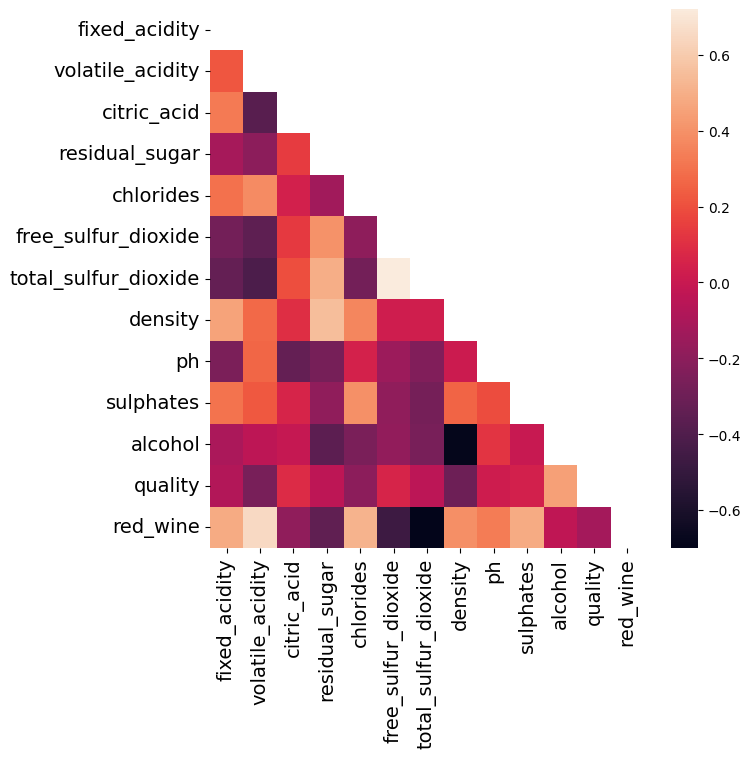

In [6]:
# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the default matplotlib figure size to 7x7:
# This sets the size of the plot that will be created.
fix, ax = plt.subplots(figsize=(7,7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
# This is used to mask the upper triangle of the correlation matrix, as it is a mirror of the lower triangle.
mask = np.zeros_like(wine_corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# A heatmap is a two-dimensional graphical representation of data where the individual values are represented as colors.
# We pass the `wine_corr` correlation matrix that we computed earlier, and the mask for the upper triangle.
# The `ax` parameter of the function is used to specify the matplotlib axes where the plot is drawn.
ax = sns.heatmap(wine_corr, mask=mask, ax=ax)

# Resize the labels.
# This sets the font size of the labels on the x-axis and y-axis.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# Display the plot
# plt.show() is used here to display the plot. If this is not included, the plot will not be displayed.
plt.show()

## Standardizing Predictors is Required

In Ridge Regression, it is necessary to standardize the predictor columns before constructing the models, including dummy-coded categorical variables. The standardization process involves scaling the variables to have a mean of 0 and a standard deviation of 1. This allows variables of different scales to contribute equally to the model, ensuring that the model is not unduly influenced by variables with larger scales.

The target variable is defined first, and then the columns that are not the target are normalized.

The equation for the Ridge penalties are as follows:

### $$ \text{Ridge penalty}\; = \alpha \sum_{j=1}^p \beta_j^2$$

Here, the Ridge penalty is equal to the tuning parameter alpha times the sum of the squared beta coefficients. This penalty term discourages large coefficients by adding a penalty proportional to the square of the magnitude of the coefficients. As a result, the model is less likely to overfit to the training data. The value of alpha determines how much weight is given to the penalty term versus the Residual Sum of Squares (RSS).

### How are the $\beta$ coefficients affected by the mean and variance of your variables?

The magnitude and sign of the $\beta$ coefficients are influenced by the mean and variance of the variables. If variables have a large variance, small changes can result in large changes in the predicted response, leading to larger $\beta$ coefficients. Conversely, if a variable's variance is small, larger changes are required to affect the predicted response, resulting in smaller $\beta$ coefficients.

Moreover, the mean of the variables shifts the regression line along the axis of the predictor variable. This shift can change the $\beta$ coefficients because changing the mean of a variable changes the position of the regression line, which in turn changes the slope of the line, and hence the $\beta$ coefficients.

Therefore, it is important to standardize the predictors so that they are on a common scale, allowing for a fair comparison between the different predictors. Without standardization, a predictor with a larger scale will have a smaller coefficient than a predictor with a smaller scale, regardless of the strength of their relationships with the target variable.

In [7]:
# The first step in developing a machine learning model is to define our target variable.
# The target variable, also known as the dependent variable, is the variable that we want to predict or forecast.
# In this case, we are interested in predicting the 'quality' of the wine, so we set 'quality' as our target variable.
# We store this information in the variable `target`.
# This way, we can use the variable `target` in our code instead of writing 'quality' each time we need it.
# Using a variable in this way makes our code more readable and flexible. If we decide to change our target variable later, we only need to change this one line of code.
target: str = 'quality'

In [9]:
# The first step is to select all the columns that are not the target, i.e., all the predictor variables.
# We do this by using a list comprehension, which generates a new list by iterating over an existing list
# and only including elements that meet a certain condition.
# In this case, we iterate over the list `wine.columns`, which contains the names of all columns in the `wine` DataFrame,
# and we only include a column name if it is not equal to the `target`.
# The resulting list, `nc`, contains the names of all predictor variables.
nc = [x for x in df.columns if x != target]

In [10]:
# Next, we standardize the predictor variables. Standardization is the process of rescaling the variables
# to have a mean of 0 and a standard deviation of 1. This is done to ensure that all variables contribute equally to the model,
# regardless of their original scale.
# To standardize a variable, we subtract the mean of the variable from each value (to center the data around 0),
# and then divide by the standard deviation (to scale the data to a standard deviation of 1).
# We apply this transformation to each predictor variable by using the pandas DataFrame method `mean` to compute the mean,
# and the method `std` to compute the standard deviation.
# Note that we subtract the mean and divide by the standard deviation for each column separately,
# which is why we use the methods `mean` and `std` on `wine[nc]`, the DataFrame that contains only the predictor variables.
# Also note that this operation modifies the `wine` DataFrame in place, replacing the original values of the predictor variables
# with their standardized values.
df[nc] = (df[nc] - df[nc].mean()) / df[nc].std()

In [11]:
# Now we want to take a look at the first few rows of our dataset to understand its structure and content.
# For this, we use the `head()` function provided by pandas DataFrame.
# `head()` returns the first `n` rows for the DataFrame object. By default, it returns the first 5 rows.

# The `df.head()` line of code will display the first five rows of our DataFrame `df`.
df.head()

# The output will be a table where each row represents a unique wine sample with measurements for each variable.
# This allows us to quickly inspect our data and can give us insights into the distribution and range of values.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine
0,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055
1,0.451001,3.281982,-2.192664,-0.597594,1.197883,-0.311296,-0.862402,0.701432,-0.115064,0.999502,-0.580023,5,1.750055
2,0.451001,2.553104,-1.917405,-0.660648,1.026618,-0.874695,-1.092402,0.768128,0.258100,0.797897,-0.580023,5,1.750055
3,3.073580,-0.362411,1.660957,-0.744721,0.541370,-0.762016,-0.986248,1.101609,-0.363840,0.327485,-0.580023,6,1.750055
4,0.142462,2.188664,-2.192664,-0.744721,0.569914,-1.100055,-1.446247,1.034913,1.812950,0.193082,-0.915394,5,1.750055


### Creating the Target and Predictor Matrix

In the upcoming steps, we're going to build two sets of target and predictor matrices (X, Y datasets). The complexity of these datasets will vary significantly.

1. **Simple Model:** The first set will be relatively simple. It will comprise all the predictor variables added together. In other words, each predictor variable will be accounted for independently in the model, without considering any interaction between variables. This approach serves as a baseline model to understand the individual impact of each predictor on the target variable.
2. **Complex Model:** The second set will be much more complex, as it will include all interactions between the predictor variables. In this model, we'll not only consider the impact of each predictor on the target variable but also how the predictors interact with each other and how these interactions affect the target variable. This approach results in a model that captures complex relationships within the data. However, it can also lead to overfitting, where the model learns the noise in the training data and performs poorly on unseen data.

To illustrate, if we had predictor variables A and B, the simple model would include these variables as they are, but the complex model would also include an interaction term A*B. This interaction term represents the combined effect of predictors A and B on the target variable. By including such interaction terms for all pairs of variables, the complex model encompasses a broader range of relationships within the data.

Remember, overfitting is a scenario where a model is fitting too closely or exactly to a particular set of data and may fail to fit additional data or predict future observations reliably.

By creating these two sets of matrices, we can effectively compare how the complexity of a model affects its performance and ability to generalize to new, unseen data.

In [12]:
# Define our predictor matrix X and target matrix Y
# 'values' attribute of the pandas DataFrame returns a numpy array
# We use the predictor variable names (nc) to select the appropriate columns from the DataFrame for X
# And the target variable name to select the appropriate column for Y
X = df[nc].values
Y = df[target].values

In [13]:
# Import the PolynomialFeatures class from sklearn.preprocessing
# This class generates polynomial and interaction features.
from sklearn.preprocessing import PolynomialFeatures

# Initialize a PolynomialFeatures object
# degree=2 specifies that we want to generate features for all polynomial combinations of the features up to degree 2
# interaction_only=True specifies that we only want to include interaction features (x1*x2, x1*x3, etc.)
# include_bias=False specifies that we do not want to include a bias column (a column of ones)
pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [14]:
# Fit the PolynomialFeatures object to our predictor matrix X
# This calculates the number of output features based on the number of input features and the degree
# In our case, this will be all unique pairs of features, because our degree is 2 and we specified interaction_only=True
pf = pf.fit(X)

In [15]:
# Transform our predictor matrix X using the fitted PolynomialFeatures object
# This creates a new feature matrix with all the interaction features
# Each interaction feature is the product of two original features
# The output is assigned to the variable Xoverfit, indicating that this feature matrix may lead to overfitting
# because it includes a large number of features.
Xoverfit = pf.transform(X)

In [16]:
# Now let's observe the shapes of our two predictor matrices, X and Xoverfit.
# The shape of a matrix is a tuple that indicates the number of rows and columns in the matrix.
# The first element of the tuple is the number of rows (which corresponds to the number of samples in our dataset),
# and the second element is the number of columns (which corresponds to the number of features in our dataset).

# We can access the shape of a matrix using the `shape` attribute. This attribute is available on all numpy arrays,
# which is the type of our predictor matrices X and Xoverfit.

# We use the `print` function to display the shapes of the matrices. The `print` function prints the specified message to the screen.
# The message can be a string, or any other object, the object will be converted into a string before written to the screen.

# First, we print the shape of the X matrix. This matrix contains the original predictor variables from our dataset.
print(X.shape)  # Outputs: (number of samples, number of original predictors)

(6497, 12)


In [17]:
# Next, we print the shape of the Xoverfit matrix. This matrix contains the original predictor variables,
# as well as interaction features that were generated using the PolynomialFeatures class from sklearn.
# Because this matrix includes interaction terms for every pair of original predictors,
# it has considerably more columns than the X matrix.
print(Xoverfit.shape)  # Outputs: (number of samples, number of original predictors + number of interaction features)

# By comparing the number of columns in the two matrices, we can see the effect of adding interaction features on the complexity of our model.
# The Xoverfit matrix, which includes interaction features, has many more features than the X matrix, which could lead to a more complex model.
# However, as we've discussed earlier, a more complex model is not always better, as it can lead to overfitting.
# Overfitting occurs when a model learns the noise in the training data and performs poorly on unseen data.
# Therefore, it's important to keep the complexity of our model in check to ensure that it generalizes well to new data.

(6497, 78)


In [21]:
# Import the train_test_split function from sklearn.model_selection.
# This function is used to split a dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Define the training and testing sets for our simple model.
# The train_test_split function shuffles the dataset and splits it into training and testing sets.
# The first argument, X, is our simple predictor matrix.
# The second argument, y, is our target matrix.
# The test_size parameter specifies the proportion of the dataset to include in the test split. Here, we use 0.3, which means that 30% of the data will be used for testing and 70% for training.
# The random_state parameter is a seed for the random number generator. This ensures that we get the same train/test split each time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
# Define the training and testing sets for our complex model.
# We only need to split the predictor matrix Xoverfit, since the target matrix y is the same for both the simple and complex models.
# We use the same test_size and random_state parameters as before.
Xo_train, Xo_test = train_test_split(Xoverfit, test_size=0.3, random_state=42)

## Defining and Visualizing the Ridge

Ridge regression introduces a new component into the loss function: the Ridge penalty term. The equation for this is:

### $$ \text{minimize:}\; RSS+Ridge = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \alpha\sum_{j=1}^p \beta_j^2$$

In this equation, the Residual Sum of Squares (RSS) represents the sum of the squared residuals, a measure of the model's error. However, Ridge regression adds a penalty to this loss function, which is designed to discourage large coefficients. This penalty term is the second part of the equation: $\alpha\sum_{j=1}^p \beta_j^2$.

The elements of the equation are defined as follows:

- $\beta_j^2$ is the squared coefficient for each predictor variable $x_j$ in the model. Squaring the coefficient magnifies the effect of large coefficients, making them contribute more heavily to the penalty. This is what encourages smaller coefficients.
- $\sum_{j=1}^n \beta_j^2$ is the sum of these squared coefficients for every predictor variable in the model. Note that this does **not** include the intercept $\beta_0$. This sum forms the basis of the Ridge penalty term.
- $\alpha$ is the tuning parameter, or regularization parameter, that determines the strength of the Ridge penalty. The larger the value of $\alpha$, the greater the impact of the Ridge penalty on the loss function and the smaller the coefficients will be. Conversely, if $\alpha$ equals zero, the Ridge penalty has no effect, and the model reverts to ordinary least squares regression. If $\alpha$ is very large, the Ridge penalty dominates the loss function, which can lead to a model with very small coefficients.

By introducing the Ridge penalty, Ridge regression can reduce the variance of the model and improve its performance, particularly in situations where the predictor variables are highly correlated. This comes at the cost of introducing some bias into the model, as the penalty term may cause it to underestimate the true coefficients. However, in many cases, this trade-off results in a net improvement in the model's predictive performance.

In [18]:
# Import the Ridge class from the linear_model module in sklearn
# This class implements ridge regression.
from sklearn.linear_model import Ridge

# Initialize a Ridge object
# The alpha parameter is the regularization strength. It is equal to the constant
# by which the sum of squares of the coefficients (also known as L2-norm) is multiplied,
# then added to the least-squares loss. Here we set alpha to be 300.
ridge_reg = Ridge(alpha=300)

In [25]:
# Fit the Ridge model to our data
# The fit method calculates the optimal values of the coefficients based on our predictor matrix X and target matrix Y.
# The fitting process involves minimizing the least squares loss function,
# which is the sum of the squared differences between the actual and predicted values,
# plus the Ridge penalty (alpha times the sum of squares of the coefficients).
# The fit method performs this optimization in the background and stores the optimal coefficients inside the Ridge object.
ridge_reg.fit(X_train, y_train)

Ridge(alpha=300)

In [26]:
# Now that we have fit our model to the training data, we can use it to make predictions on the test data.
# We do this using the `predict` method of the Ridge object.
# The `predict` method takes a predictor matrix (X_test) as input and returns a vector of predicted target values.
# These predicted values are based on the coefficients that were calculated during the fitting process.
# The resulting predictions are assigned to the variable `y_pred`.
y_pred = ridge_reg.predict(X_test)

In [27]:
# Import the mean_squared_error function from sklearn.metrics
# This function calculates the mean squared error (MSE) between the actual and predicted values.
# MSE is a measure of the average squared difference between the actual and predicted values.
# It is a popular metric for regression problems because it punishes large errors more heavily due to the squaring operation.
from sklearn.metrics import mean_squared_error as mse

# Next, we calculate the root mean squared error (RMSE) of our predictions.
# The RMSE is the square root of the MSE.
# Taking the square root is useful because it brings the error metric back to the original units of the target variable,
# which can make it easier to interpret.
# We use the `mse` function that we imported from sklearn.metrics to calculate the MSE,
# and then take the square root using the `np.sqrt` function from numpy.
# The resulting RMSE is assigned to the variable `rmse`.
rmse = np.sqrt(mse(y_test, y_pred))

# In this line of code, we print the value of `rmse` to the console.
# This will tell us the RMSE of our Ridge regression model on the test data.
# The RMSE is a measure of the model's prediction error.
# Specifically, it measures the standard deviation of the residuals (prediction errors).
# Residuals are a measure of how far from the regression line data points are,
# so RMSE is a measure of how spread out these residuals are.
# In other words, it tells you how concentrated the data is around the line of best fit.
# Lower values of RMSE indicate better fit.
print(rmse)

0.7251395917581572


In [28]:
# Initialize a Ridge object.
# The alpha parameter is the regularization strength. It is equal to the constant
# by which the sum of squares of the coefficients (also known as L2-norm) is multiplied,
# then added to the least-squares loss. Here we set alpha to be 300.
ridge_reg = Ridge(alpha=300)

# Fit the Ridge model to our data.
# This time, we're using our "overfit" training data, Xo_train, which includes interaction terms.
# The fit method calculates the optimal values of the coefficients based on our predictor matrix Xo_train and target matrix y_train.
ridge_reg.fit(Xo_train, y_train)

# Now that we have fit our model to the training data, we can use it to make predictions on the "overfit" test data.
# We do this using the `predict` method of the Ridge object.
# The `predict` method takes a predictor matrix (Xo_test) as input and returns a vector of predicted target values (yo_pred).
yo_pred = ridge_reg.predict(Xo_test)

# Next, we calculate the root mean squared error (RMSE) of our predictions.
# The RMSE is the square root of the MSE.
# Taking the square root is useful because it brings the error metric back to the original units of the target variable,
# which can make it easier to interpret.
rmse = np.sqrt(mse(y_test, yo_pred))

# Finally, we print the value of `rmse` to the console.
# This will tell us the RMSE of our Ridge regression model on the "overfit" test data,
# giving us a measure of how well our model with interaction terms performs on unseen data.
print(rmse)

0.6973318738186858


The Root Mean Squared Error (RMSE) is a measure of how well the model can predict new data. Specifically, it measures the average discrepancy between the predicted and actual values of the target variable. The lower the RMSE, the better the model's predictive performance.

In this case, two different models were evaluated: the Ridge Regression model and the Ridge Regression Overfit model. The difference between these models lies in the complexity of the features they were trained on. The Ridge Regression model was trained on the original predictor variables, whereas the Ridge Regression Overfit model was trained on both the original predictor variables and additional interaction features.

The RMSE for the Ridge Regression model was found to be approximately 0.725. This indicates that, on average, the model's predictions deviate from the actual values by about 0.725 units.

The RMSE for the Ridge Regression Overfit model was found to be approximately 0.697. This lower RMSE suggests that the Overfit model, despite its complexity, was able to predict new data more accurately than the simpler model. However, the difference in RMSE between the two models is relatively small, suggesting that the addition of interaction features did not significantly improve performance.

It's worth noting that while a lower RMSE is generally better, a model with a lower RMSE is not necessarily the better model. A complex model with a lower RMSE on the training data may simply be overfitting to the noise in the training data, and may perform poorly when predicting new data. In contrast, a simpler model with a slightly higher RMSE may generalize better to new data. These trade-offs need to be considered when comparing models and selecting the best one for prediction.

In [29]:
# Import the r2_score function from sklearn.metrics. This function computes the coefficient of determination,
# commonly known as the R-squared score. This score provides a measure of how well observed outcomes are replicated by the model.
from sklearn.metrics import r2_score

# Calculate the R-squared score for the Ridge Regression model.
# The r2_score function takes two arguments: the actual values (y_test) and the predicted values (y_pred).
ridge_r2 = r2_score(y_test, y_pred)

# Calculate the R-squared score for the Ridge Regression Overfit model.
# Again, we use the r2_score function, this time with the actual values (y_test) and the predicted values from the overfit model (yo_pred).
overfit_r2 = r2_score(y_test, yo_pred)

# Calculate the number of samples (n) and the number of predictor variables (p) for each model.
# For the Ridge Regression model, the number of predictor variables is the number of columns in X_train.
# For the Ridge Regression Overfit model, the number of predictor variables is the number of columns in Xo_train.
n = len(y_test)
p = X_train.shape[1]
po = Xo_train.shape[1]

# Calculate the Adjusted R-squared score for each model.
# The Adjusted R-squared score adjusts the R-squared score based on the number of predictor variables.
# It's a more accurate measure of the goodness-of-fit of the model, especially when dealing with multiple predictors.
# The formula for the Adjusted R-squared score is 1 - (1 - R^2) * ((n - 1) / (n - p - 1)).
ridge_adj_r2 = 1 - (1 - ridge_r2) * ((n - 1) / (n - p - 1))
overfit_adj_r2 = 1 - (1 - overfit_r2) * ((n - 1) / (n - po - 1))

# Print the Adjusted R-squared score for each model.
# These scores give us an idea of how well each model fits the data, taking into account the number of predictor variables.
print(f'Adjusted R-squared for Ridge Regression: {ridge_adj_r2}')
print(f'Adjusted R-squared for Ridge Regression Overfit: {overfit_adj_r2}')

Adjusted R-squared for Ridge Regression: 0.27486839415860365
Adjusted R-squared for Ridge Regression Overfit: 0.30576186580333486


The Adjusted R-squared values shown are results from the Ridge Regression and the Ridge Regression Overfit models. The Adjusted R-squared is a statistical measure that indicates the goodness of fit of a regression model and adjusts for the number of predictors in the model. It is an extension of R-squared that penalizes the addition of extraneous predictors to the model.

The Adjusted R-squared for Ridge Regression is approximately 0.275. This suggests that about 27.5% of the variance in the dependent variable is predictable from the independent variables of the Ridge Regression model.

The Adjusted R-squared for Ridge Regression Overfit is approximately 0.306. This indicates that about 30.6% of the variance in the dependent variable is predictable from the independent variables of the Ridge Regression Overfit model.

The formula used to calculate the Adjusted R-squared is:

`1 - (1 - R^2) * ((n - 1) / (n - p - 1))`

Where:

- R^2 is the R-squared of the model
- n is the number of observations
- p is the number of predictors

The formula essentially adjusts the R-squared value based on the number of predictors. More predictors in a model usually increase the R-squared value, making the model seem better than it actually is. The Adjusted R-squared compensates for this by decreasing when unnecessary predictors are included in the model.

In this case, even though the Overfit model has a higher Adjusted R-squared, it doesn't necessarily mean it's a better model. It's important to be cautious with models that include many predictors, like the Overfit model, as they can lead to overfitting - a situation where a model learns the noise in the training data and performs poorly on unseen data.